In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

%matplotlib inline

In [664]:
def load_benchmark(name, date=''):
    df = pd.read_csv(name)
    df[date] = pd.to_datetime(df[date])
    df = df.set_index(date).sort_index()
    for c in df.columns:
        df.loc[(df[c] == '0') | (df[c] == 'null') | (df[c] == ''), c] = None
        df[c] = df[c].str.replace(',', '.')
    return df.astype(float)

cdi  = load_benchmark('./cvm/cdi.csv',  date='data')
ibov = load_benchmark('./cvm/BVSP.csv', date='Date')[['Close']]
ibov.columns = [ 'ibov' ]

iix = pd.merge( cdi, ibov, right_index=True, left_index=True)
iix = iix.dropna(axis=0, how='any')

for c in iix.columns:
    iix[c + '_6m'] = iix[c]  / iix[c].shift(freq=pd.Timedelta('180d'))
    iix[c + '_1d'] = (iix[c] / iix[c].shift(1)).fillna(1)
iix.head()

,cdi,ibov,cdi_6m,cdi_1d,ibov_6m,ibov_1d
1993-04-27,41.69,24.500000,NaN,1.000000,NaN,1.000000
1993-04-28,41.23,24.299999,NaN,0.988966,NaN,0.991837
1993-04-29,40.39,23.700001,NaN,0.979626,NaN,0.975309
1993-04-30,39.07,24.100000,NaN,0.967319,NaN,1.016878
1993-05-03,31.37,24.100000,NaN,0.802918,NaN,1.000000


In [624]:
def cadastro(cnpj):
    val = fi.ix[cnpj]
    return val if type(val) == pd.core.series.Series else val.ix[0]
    
def nome(cnpj):
    return cadastro(cnpj)['DENOM_SOCIAL']
        
def search_name(name):
    return fi[fi.DENOM_SOCIAL.str.contains(name)]

fi = pd.read_csv('./cvm/inf_cadastral_fi_20171013.csv', sep=';', index_col=0, encoding='iso-8859-1')
fi.CLASSE = fi.apply(lambda x: 'Fundo de Credito' if 'PRIVADO' in x.DENOM_SOCIAL else x.CLASSE, axis=1)
fi.head()

,DENOM_SOCIAL,DT_REG,DT_CONST,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,CLASSE,DT_INI_CLASSE,RENTAB_FUNDO,...,INVEST_QUALIF,TAXA_PERFM,VL_PATRIM_LIQ,DT_PATRIM_LIQ,DIRETOR,CNPJ_ADMIN,ADMIN,PF_PJ_GESTOR,CPF_CNPJ_GESTOR,GESTOR
CNPJ_FUNDO,,,,,,,,,,,,,,,,,,,,,
22.773.440/0001-14,095 FUNDO DE INVESTIMENTO RENDA FIXA CRÉDITO P...,2015-12-18,2015-06-16,NaN,EM FUNCIONAMENTO NORMAL,2015-12-28,2015-12-28,Fundo de Credito,2015-06-16,OUTROS,...,S,0.000000000000,21262673.26,2017-10-10,MARC FORSTER,07.437.241/0001-41,WESTERN ASSET MANAGEMENT COMPANY DTVM LIMITADA,PJ,07.437.241/0001-41,WESTERN ASSET MANAGEMENT COMPANY DTVM LIMITADA
23.654.732/0001-09,096 FUNDO DE INVESTIMENTO RENDA FIXA CRÉDITO P...,2015-12-18,2015-10-08,2015-12-29,CANCELADA,2015-12-29,2015-12-24,Fundo de Credito,2015-12-29,OUTROS,...,S,0.000000000000,75414.37,2015-12-28,PAULO EDUARDO CLINI,07.437.241/0001-41,WESTERN ASSET MANAGEMENT COMPANY DTVM LIMITADA,PJ,07.437.241/0001-41,WESTERN ASSET MANAGEMENT COMPANY DTVM LIMITADA
12.636.533/0001-43,1-S FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS D...,2011-04-27,2011-04-27,2013-12-27,CANCELADA,2013-12-27,2012-11-23,Fundo Multimercado,2011-04-27,DI de um dia,...,S,NaN,0.00,2014-01-09,NaN,NaN,NaN,NaN,NaN,NaN
14.487.351/0001-83,1008 FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS ...,2012-02-22,2011-10-04,2013-10-25,CANCELADA,2013-10-25,2012-06-29,Fundo de Credito,2011-10-04,DI de um dia,...,S,NaN,0.00,2013-11-07,JOSÉ CARLOS LOPES XAVIER DE OLIVEIRA,02.201.501/0001-61,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,PJ,08.896.477/0001-09,BNY MELLON ALOCAÇÃO DE PATRIMÔNIO LTDA
11.286.460/0001-44,101 AGGREGA FUNDO DE INVESTIMENTO RENDA FIXA C...,2011-05-16,2011-05-16,NaN,EM FUNCIONAMENTO NORMAL,2011-05-16,2011-05-16,Fundo de Credito,2011-05-16,DI de um dia,...,S,NaN,2875607.78,2017-10-10,DANIEL DOLL LEMOS,62.285.390/0001-40,SOCOPA SOCIEDADE CORRETORA PAULISTA SA,PJ,08.195.535/0001-77,AGGREGA INVESTIMENTOS LTDA.


In [4]:
allFiles = glob.glob("./cvm/*/*.csv")

df = pd.DataFrame()
for file_ in allFiles:
    print ".",
    tmp = pd.read_csv(file_, index_col=None, header=0, sep=';')
    df  = df.append(tmp[['CNPJ_FUNDO', 'DT_COMPTC', 'VL_QUOTA']])

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


In [5]:
df['DT_COMPTC'] = pd.to_datetime(df['DT_COMPTC'])
df              = df.sort_values(by='DT_COMPTC')

In [6]:
df              = df[ df.CNPJ_FUNDO.isin(fi[fi.SIT != 'CANCELADA'].index) ]
df              = df[ df.VL_QUOTA > 0.01 ]

In [667]:
df['1d'] = df['VL_QUOTA'] / df.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(1)
df['6m'] = df['VL_QUOTA'] / df.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(360*0.5)
df['1y'] = df['VL_QUOTA'] / df.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(360*1)
df['3y'] = df['VL_QUOTA'] / df.groupby('CNPJ_FUNDO')['VL_QUOTA'].shift(360*3)

In [ ]:
def come_quota(row):
    info = fi.ix[row.CNPJ_FUNDO]
    cost = row.VL_QUOTA * float(info['TAXA_ADM'])/12
    
    if info['TAXA_PERF']:
        benchmark = iix.ix[row.DT_COMPTC]
        if row['6m_gross'] > benchmark['6m_gross']:
            taxa  = (row['1m_gross'] - benchmark['1m_gross']) * info['TAXA_PERF']
            base  = row['VL_QUOTA'] # row['VL_QUOTA'] - row['VL_QUOTA']/row['1m_gross']
            cost += base * taxa
        
    if multi and row.index.dt.month in [5,11] and row.index.dt.day == 1:
        base  = row['VL_QUOTA'] - row['VL_QUOTA']/row['6m_gross']
        cost += base * 0.15

    return cost

# df['quota_prev'] = df.groupby('CNPJ_FUNDO')['VL_QUOTA'].transform('shift', 1)
# df['lucro']      = df['VL_QUOTA'] / df['quota_prev']
# df['custo']      = df.apply(come_quota)

## Performance

In [450]:
from IPython.display import display, Markdown, Latex

def plot_rent(cnpj, window, **kwargs):
    hist  = search_fundo(cnpj)
    hist  = hist[~hist[window].isnull()]
    if hist.shape[0] == 0: return
    hist[window].plot(sharex=True, **kwargs)

def plot_fundo(cnpj,  **kwargs):
    hist = search_fundo(cnpj)
    base = hist['VL_QUOTA'][-1]
    quotas = hist['VL_QUOTA'] / base
    if 'label' not in kwargs:
        kwargs['label'] = ''
    kwargs['label'] += " | %.2f %.2f" % ( hist['6m_gross'][-1], hist['3y_gross'][-1] )
    quotas.plot(sharex=True, ax=plt.gca(), **kwargs)
    plt.legend(loc=0)

def plot_fundos(kwargs):
    plt.figure(figsize=(25,12))
    for k,l in kwargs.iteritems():
        plot_fundo(k, label=l)
    plt.legend(loc=2)
    plt.show()
    
def plot_topk(classe, k=30):
    fundos = fi[fi.CLASSE == classe]
    display(Markdown('### '+ classe))
    #+( str(classe) if type(classe) == float else classe ).encode('utf-8')) )
    added = 0
    for i in top.index[ top.index.isin( fundos.index ) ]:
        if added == k: break
        if cadastro(i)['CONDOM'] != 'Aberto' or cadastro(i)['FUNDO_EXCLUSIVO'] != 'N': continue
        print nome(i), i
        plot_fundo(i)
        plt.show()
        added += 1

def search_fundo(cnpj):
    return df[(df.CNPJ_FUNDO == cnpj) & (~df.VL_QUOTA.isnull())].set_index('DT_COMPTC')


In [139]:
top  = df \
    .groupby('CNPJ_FUNDO')['3y_gross'].last() \
    .sort_values(ascending=False)

### Fundo de Ações

SANTANDER FUNDO DE INVESTIMENTO COLABORADORES MAGAZINE LUIZA AÇÕES 13.199.100/0001-30


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  # This is added back by InteractiveShellApp.init_path()


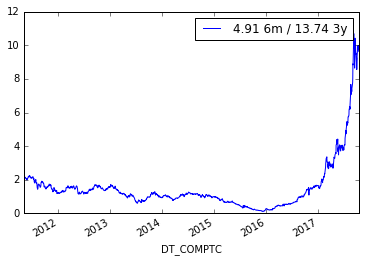

FUNDO DE INVESTIMENTO DE AÇÕES ORGANON 17.400.251/0001-66


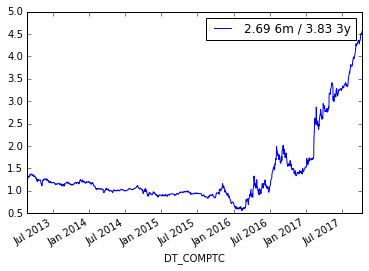

NEO FUTURE FUNDO DE INVESTIMENTO EM AÇÕES 16.816.153/0001-41


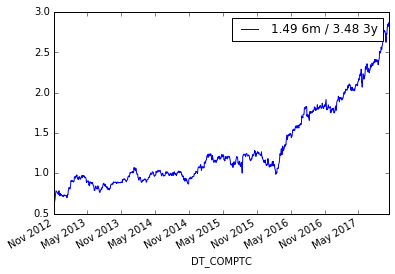

ALASKA BLACK MASTER FUNDO DE INVESTIMENTO EM AÇÕES - BDR NÍVEL  I 12.055.107/0001-16


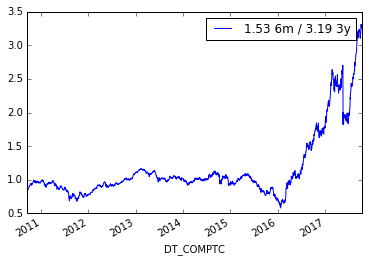

FARO CAPITAL FUNDO DE INVESTIMENTO EM AÇÕES INVESTIMENTO NO EXTERIOR 10.565.870/0001-61


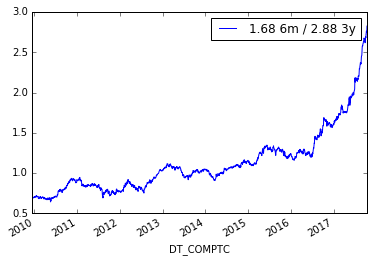

ALASKA BLACK FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM AÇÕES - BDR NÍVEL I 12.987.743/0001-86


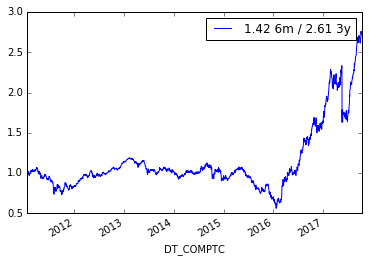

ATMOS MASTER FUNDO DE INVESTIMENTO DE AÇÕES 11.188.572/0001-62


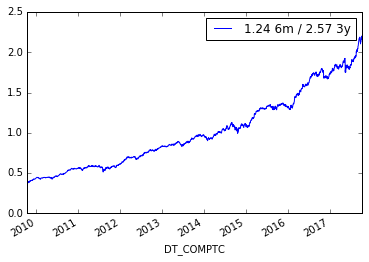

BRESSER AÇÕES MASTER FUNDO DE INVESTIMENTOS EM AÇÕES 16.993.142/0001-37


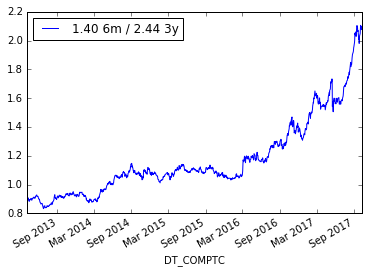

ATMOS SOL FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM AÇÕES 11.145.366/0001-75


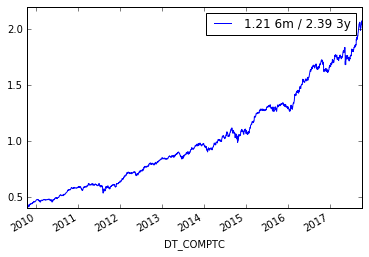

ACCESS USA COMPANIES FUNDO DE INVESTIMENTO EM AÇÕES - INVESTIMENTO NO EXTERIOR 11.147.668/0001-82


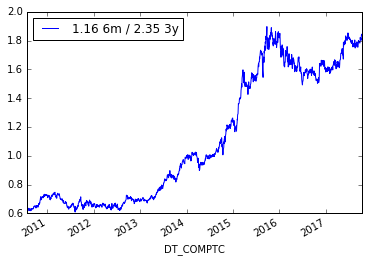

LECT FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO DE AÇÕES 97.929.197/0001-80


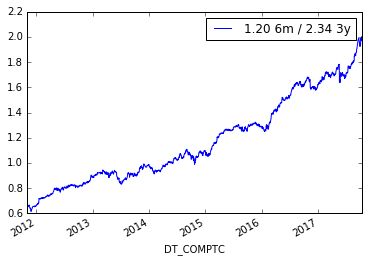

OCEANA LONG BIASED MASTER FUNDO DE INVESTIMENTO DE AÇÕES 15.174.615/0001-01


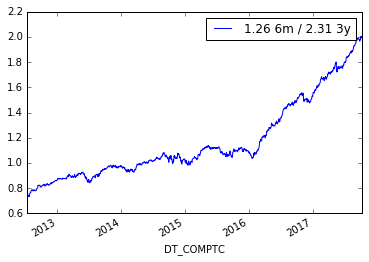

ATMOS AÇÕES FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM AÇÕES 11.145.320/0001-56


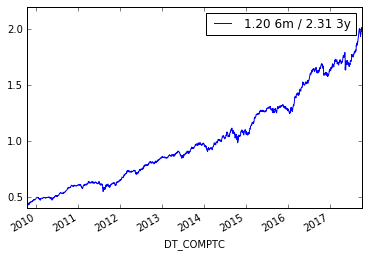

ATMOS PWM FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO AÇÕES 17.863.625/0001-80


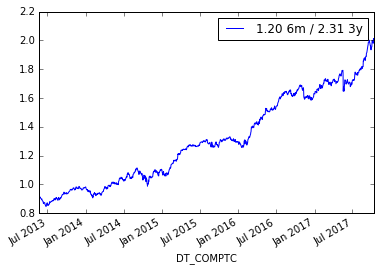

INDIE MASTER FUNDO DE INVESTIMENTO DE AÇÕES 17.335.645/0001-88


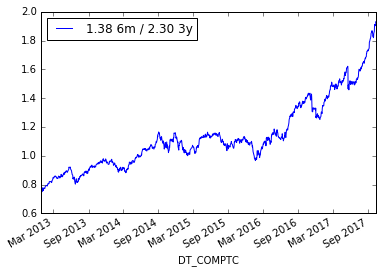

ATMOS LYRA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO AÇÕES 17.070.874/0001-18


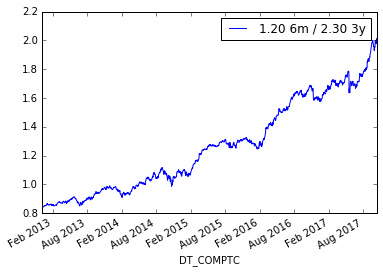

ATMOS PRIME FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO AÇÕES 17.327.620/0001-32


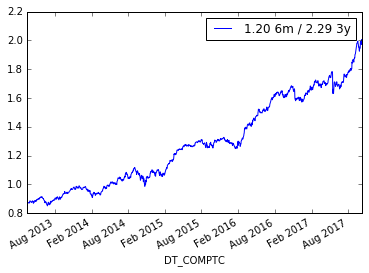

EOS HERCULES FUNDO DE INVESTIMENTO DE AÇÕES 11.490.626/0001-40


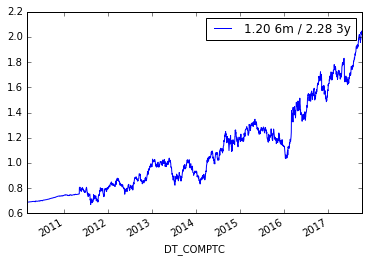

TI HOLD FUNDO DE INVESTIMENTO EM AÇÕES INVESTIMENTO NO EXTERIOR 13.592.382/0001-31


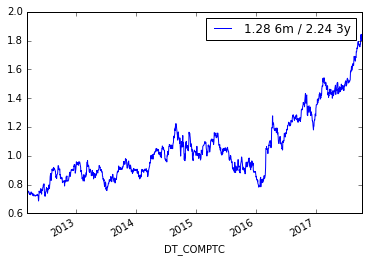

GTI DIMONA BRASIL FUNDO DE INVESTIMENTO EM AÇÕES 09.143.435/0001-60


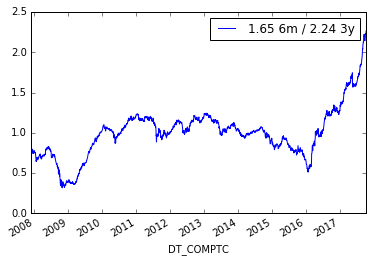

TEMPO CAPITAL PRINCIPAL FUNDO DE INVESTIMENTO DE AÇÕES 11.046.362/0001-30


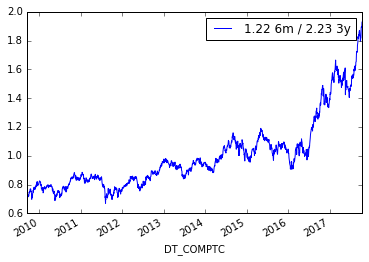

UV ARAUCÁRIA FUNDO DE INVESTIMENTO EM AÇÕES 15.715.034/0001-30


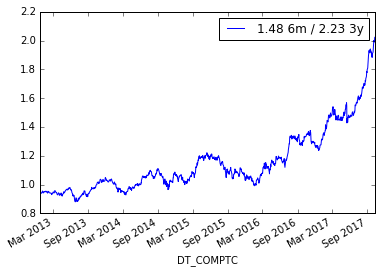

ATM FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM AÇÕES 15.862.847/0001-52


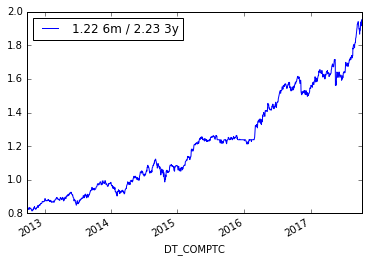

ITAÚ PHOENIX AÇÕES FUNDO DE INVESTIMENTO 09.094.073/0001-64


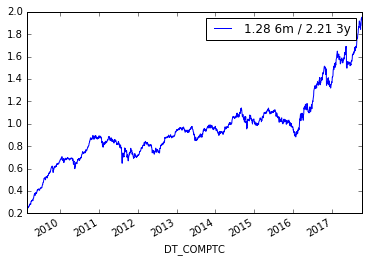

ITAÚ AÇÕES ITAÚ UNIBANCO - FUNDO DE INVESTIMENTO 08.749.127/0001-10


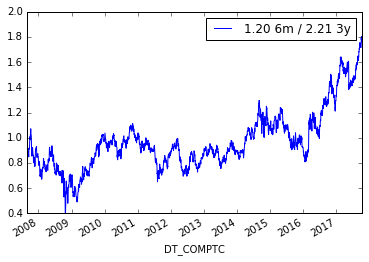

JATLAN FUNDO DE INVESTIMENTO EM AÇÕES 07.047.842/0001-48


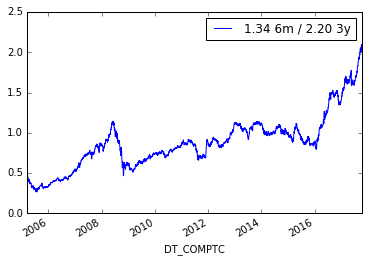

GAP EQUITY VALUE MASTER FUNDO DE INVESTIMENTO DE AÇÕES 13.549.298/0001-35


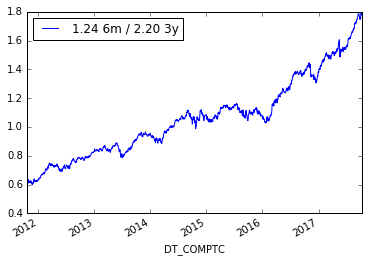

ELIZABETHA FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO EM AÇÕES 11.046.271/0001-02


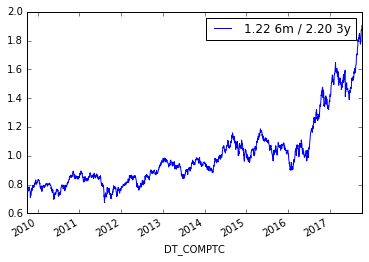

BB TOP AÇÕES SETOR FINANCEIRO FUNDO DE INVESTIMENTO 08.973.959/0001-15


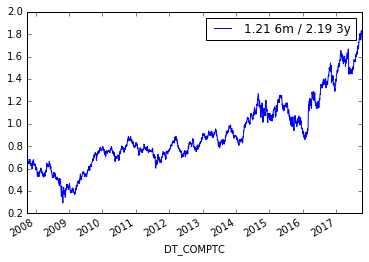

DUO GAP EQUITY VALUE FUNDO DE INVESTIMENTO DE AÇÕES 12.565.167/0001-89


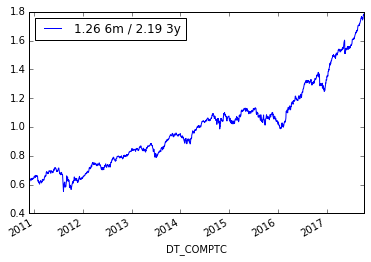

In [157]:
plot_topk(u'Fundo de Ações', k=30)

### Fundo de Credito

DUETO FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO 11.090.133/0001-12


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  # This is added back by InteractiveShellApp.init_path()


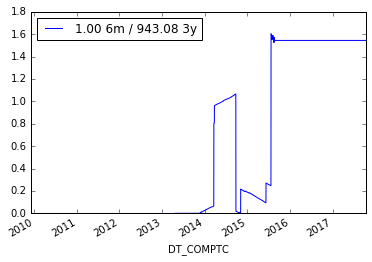

EQUIS HIGH FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO 16.984.349/0001-45


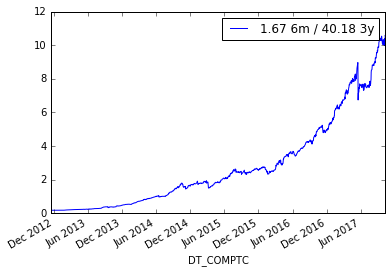

FUNDO DE INVESTIMENTO EM QUOTAS DE FI MULTIMERCADO CRÉDITO PRIVADO EQUIS - INVESTIMENTO NO EXTERIOR 14.082.760/0001-08


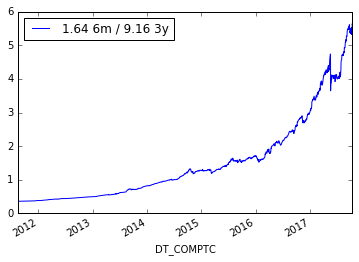

CAMBRIDGE PRIVATE FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO - INVESTIMENTO NO EXTERIOR 08.621.537/0001-80


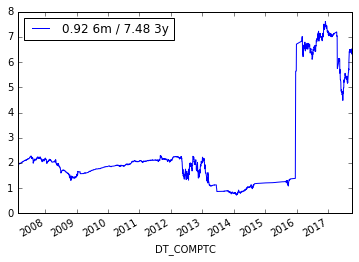

LYNX II MULTIMERCADO CRÉDITO PRIVADO FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO 17.072.601/0001-02


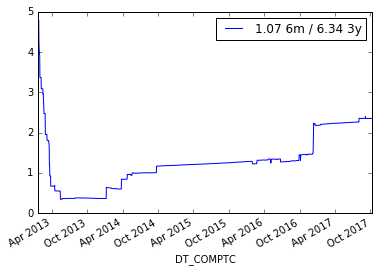

ÁRTICO FUNDO DE INVESTIMENTO MULTIMERCADO CRÉDITO PRIVADO 07.914.836/0001-40


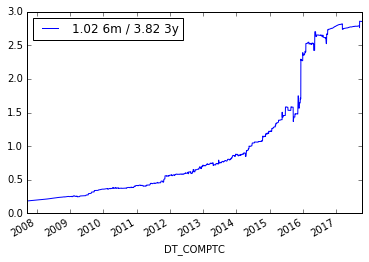

SANTOS CREDIT PLUS FUNDO DE INVESTIMENTO RENDA FIXA CRÉDITO PRIVADO 06.968.094/0001-73


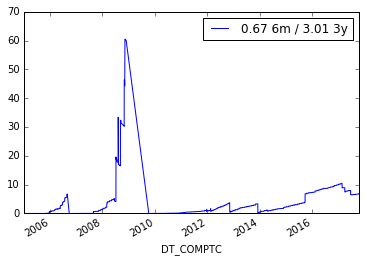

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


SPX RAPTOR MASTER FUNDO DE INVESTIMENTO NO EXTERIOR MULTIMERCADO CRÉDITO PRIVADO 12.808.980/0001-32


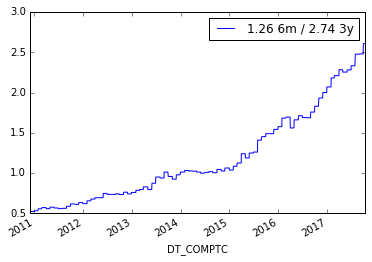

SPX RAPTOR ONE INVESTIMENTO NO EXTERIOR FIC FI MULTIMERCADO CRÉDITO PRIVADO 18.096.027/0001-95


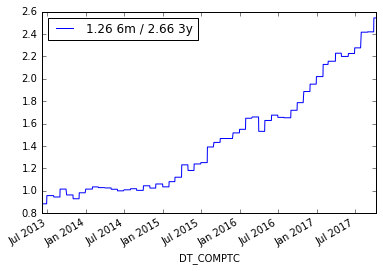

CSHG POSITANO FUNDO DE INVESTIMENTO MULTIMERCADO - CRÉDITO PRIVADO INVESTIMENTO NO EXTERIOR 97.711.812/0001-87


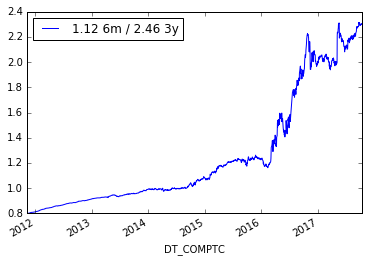

ROSTOCK FUNDO DE INVESTIMENTO MULTIMERCADO CREDITO PRIVADO INVESTIMENTO NO EXTERIOR 14.399.744/0001-35


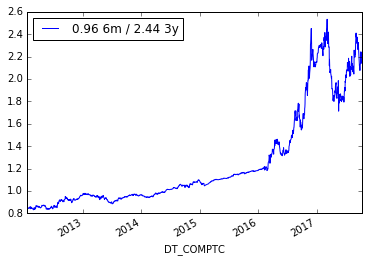

In [154]:
plot_topk('Fundo de Credito', k=40)

### Fundo Multimercado

Aberto N
CONCÓRDIA TI FUNDO DE INVESTIMENTO MULTIMERCADO LONGO PRAZO 

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  # This is added back by InteractiveShellApp.init_path()


08.843.959/0001-09


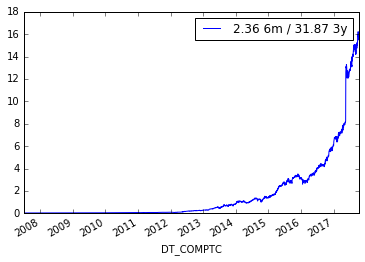

Aberto N
R&C PLUS FUNDO DE INVESTIMENTO MULTIMERCADO 12.078.239/0001-63


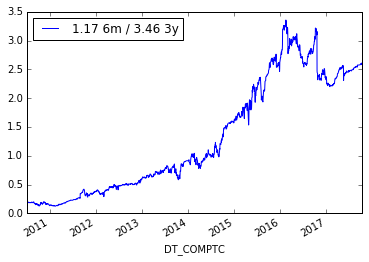

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Aberto N
KAPITALO MASTER II FUNDO DE INVESTIMENTO MULTIMERCADO 12.083.748/0001-84


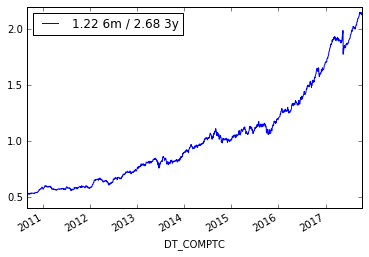

Aberto N
KAPITALO ESTRATÉGIAS MASTER FUNDO DE INVESTIMENTO MULTIMERCADO 15.831.937/0001-86


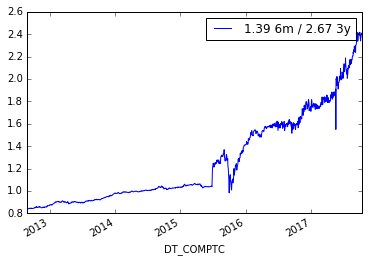

Aberto N
BRAZIL EAGLE FUNDO DE INVESTIMENTO MULTIMERCADO - INVESTIDORES NÃO RESIDENTES 14.162.755/0001-05


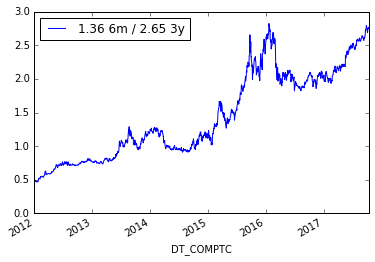

Aberto N
BAHIA AM MARAÚ MASTER RFC FUNDO DE INVESTIMENTO MULTIMERCADO 17.080.119/0001-14


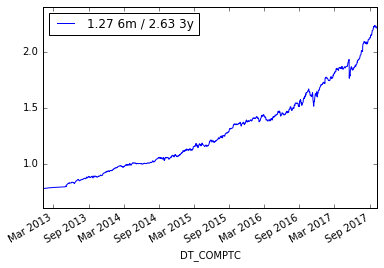

Aberto N
WESTERN ASSET US INDEX 500 FUNDO DE INVESTIMENTO MULTIMERCADO 17.453.850/0001-48


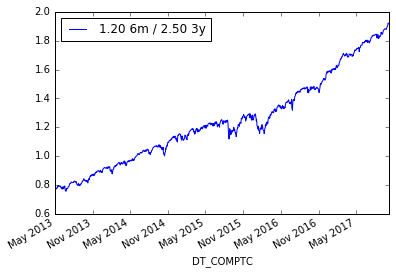

Aberto N
IBIUNA LONG BIASED MASTER FUNDO DE INVESTIMENTO MULTIMERCADO 17.554.210/0001-24


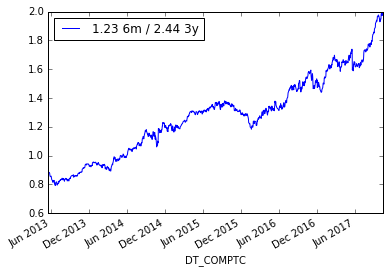

Aberto N
WM AMERICAN EQUITIES FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO 17.822.186/0001-67


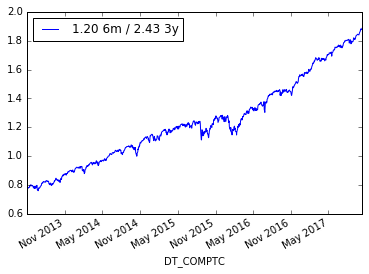

Aberto N
KADIMA HIGH VOL FUNDO DE INVESTIMENTO MULTIMERCAD 14.146.496/0001-10


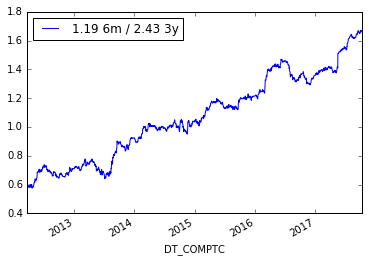

Aberto N
SAFRA S&P FUNDO DE INVESTIMENTO MULTIMERCADO 15.674.619/0001-59


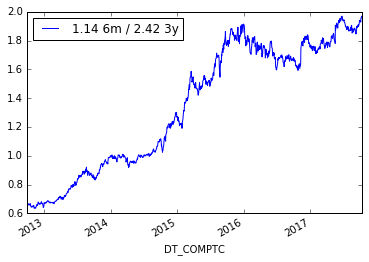

Aberto N
CSHG 931 FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO MULT - CRED PRIV IE 13.703.693/0001-20


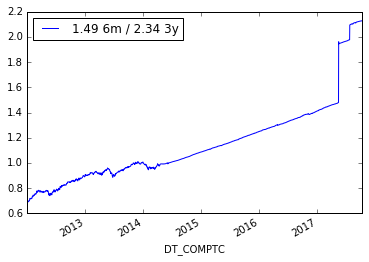

Aberto N
MURANO MASTER FUNDO DE INVESTIMENTO MULTIMERCADO 09.573.796/0001-46


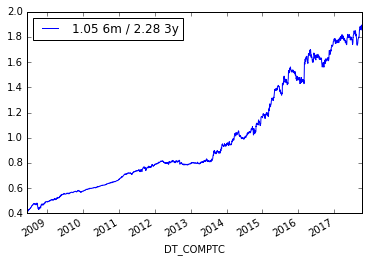

Aberto N
KAPITALO ZEVA FUNDO DE INVESTIMENTO EM QUOTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO 13.081.827/0001-19


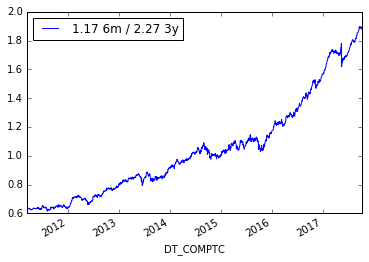

Aberto N
KAPITALO ZETA FUNDO DE INVESTIMENTO EM QUOTAS DE FUNDOS DE INVESTIMENTO MULTIMERCADO 12.105.992/0001-09


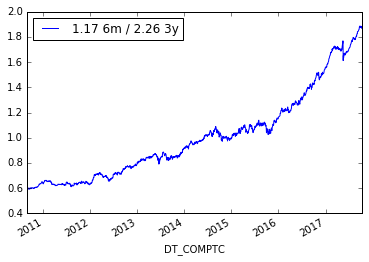

Aberto N
PACIFICO LB MASTER FUNDO DE INVESTIMENTO MULTIMERCADO 17.039.320/0001-58


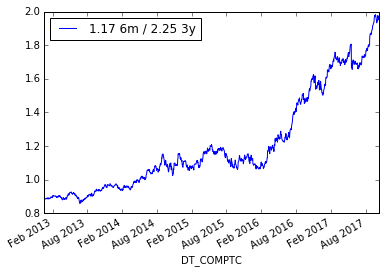

Aberto N
PLATINA TRADING FUNDO DE INVESTIMENTO MULTIMERCADO 16.566.519/0001-71


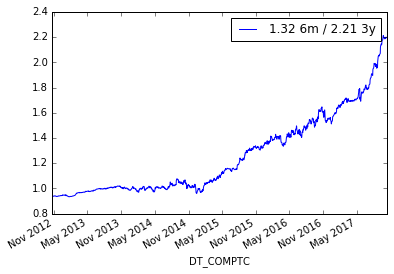

In [151]:
plot_topk('Fundo Multimercado', k=20)

### Fundo Cambial

Aberto N

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  # This is added back by InteractiveShellApp.init_path()



SUL AMÉRICA CAMBIAL FUNDO DE INVESTIMENTO 10.399.849/0001-33


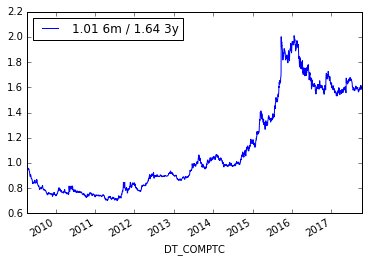

Aberto N
BB TOP DOLAR FUNDO DE INVESTIMENTO CAMBIAL LP 02.838.583/0001-50


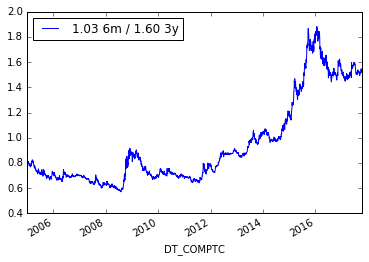

Aberto N
BB PROEX CAMBIAL LP FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO 03.300.371/0001-87


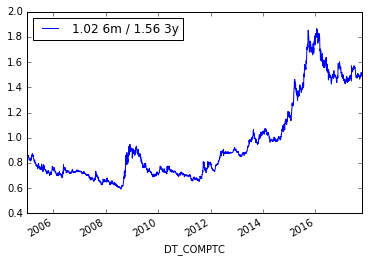

Aberto N
FUNDO DE INVESTIMENTO CAIXA MASTER CAMBIAL DÓLAR 05.164.377/0001-08


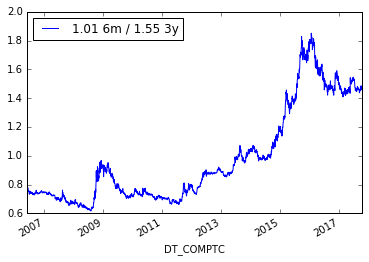

Aberto N
BB CAMBIAL DOLAR LP 100 MIL FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO 04.061.044/0001-82


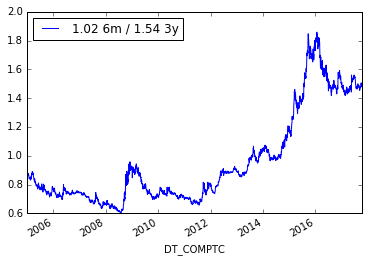

Aberto N
BB CAMBIAL DOLAR LP ESTILO FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO 04.128.893/0001-06


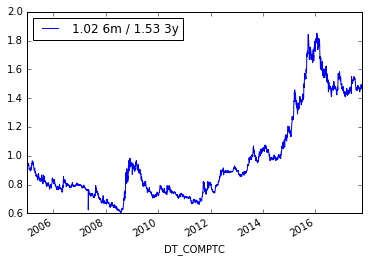

Aberto N
BB CAMBIAL DOLAR LP 20 MIL FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO 00.822.063/0001-23


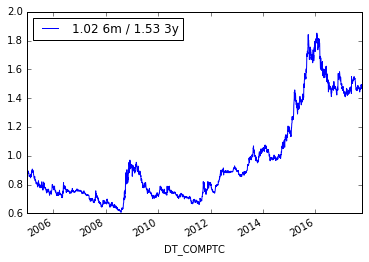

Aberto N
BB METROPOLITANO FUNDO DE INVESTIMENTO CAMBIAL LP 13.076.770/0001-60


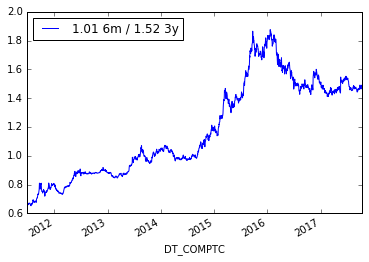

Aberto N
VOTORANTIM FUNDO DE INVESTIMENTO ALLOCATION CAMBIAL DÓLAR 09.352.825/0001-40


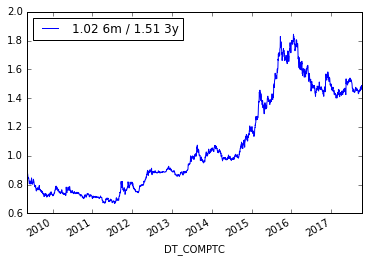

Aberto N
ITAÚ EXCHANGE CAMBIAL - FUNDO DE INVESTIMENTO 02.290.279/0001-10


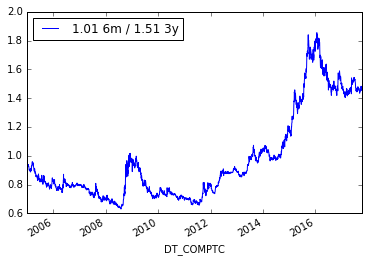

Aberto N
BRAM FUNDO DE INVESTIMENTO CAMBIAL DÓLAR 04.443.397/0001-47


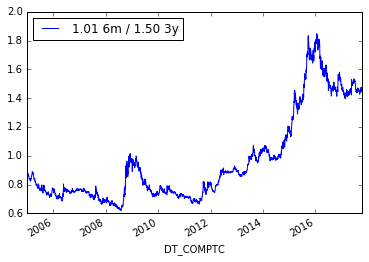

Aberto N
BRADESCO FUNDO DE INVESTIMENTO CAMBIAL DÓLAR TOP 04.875.166/0001-02


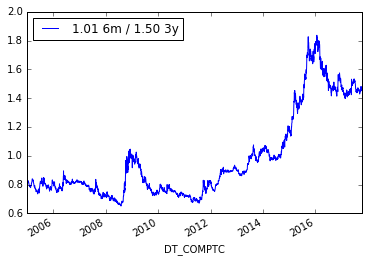

Aberto N
BB CAMBIAL DOLAR LP MIL FUNDO DE INVESTIMENTO EM COTAS DE FUNDO DE INVESTIMENTO 03.033.971/0001-26


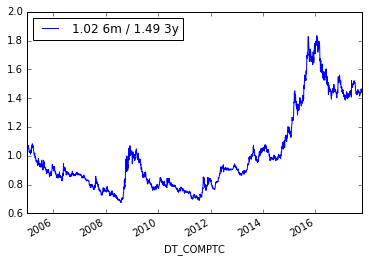

Aberto N
BRADESCO FUNDO DE INVESTIMENTO CAMBIAL DÓLAR HEDGE 03.682.381/0001-24


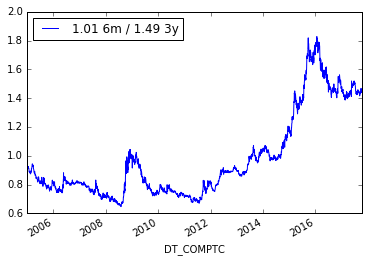

Aberto N
FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO CAIXA CAMBIAL DÓLAR 05.114.733/0001-70


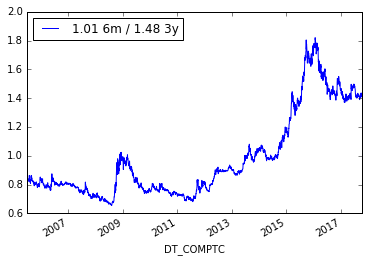

Aberto N
SANTANDER FI VIP CAMBIAL 10.362.043/0001-70


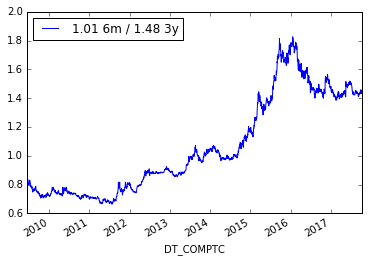

Aberto N
ITAÚ CAMBIAL FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO 01.623.535/0001-81


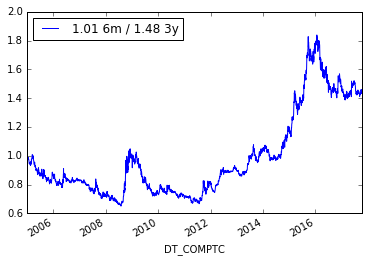

Aberto N
CSHG FUNDO DE INVESTIMENTO CAMBIAL 01.464.595/0001-07


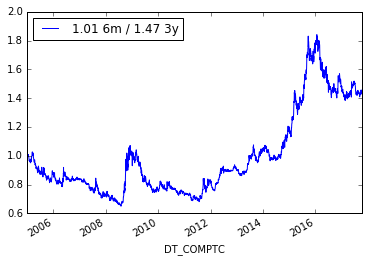

Aberto N
BRADESCO PRIVATE FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO CAMBIAL DÓLAR 04.521.982/0001-18


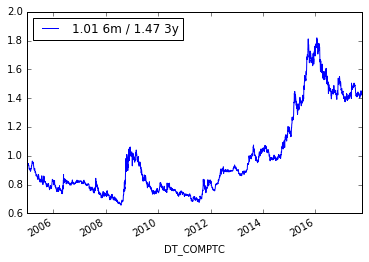

Aberto N
ITAÚ B CAMBIAL FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO 00.822.954/0001-80


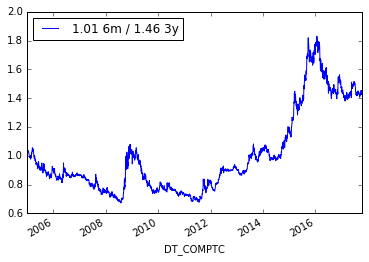

Aberto N
SAFRA CARTEIRA CAMBIAL FUNDO DE INVESTIMENTO CAMBIAL 04.103.968/0001-02


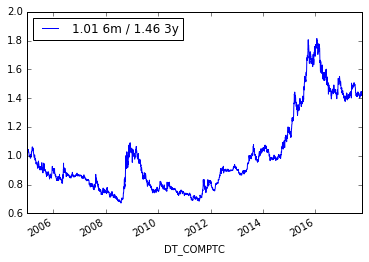

Aberto N
BRADESCO CORPORATE FUNDO DE INVESTIMENTO CAMBIAL DÓLAR HEDGE PLUS 02.225.240/0001-10


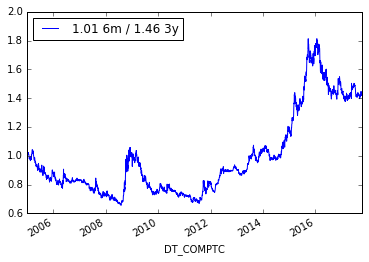

Aberto N
TOKYO-MITSUBISHI UFJ JUMP FUNDO DE INVESTIMENTO CAMBIAL DÓLAR 01.789.845/0001-70


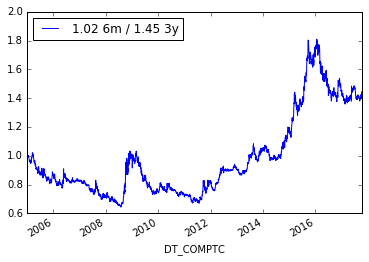

Aberto N
VOTORANTIM FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE INVESTIMENTO CAMBIAL DOLAR 03.319.016/0001-50


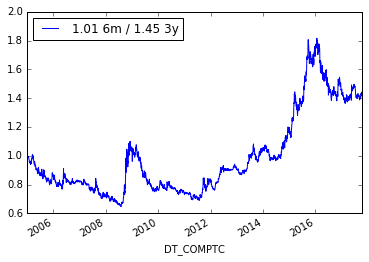

In [148]:
plot_topk('Fundo Cambial', k=15)

## Correlacao

In [469]:
fundos = {
    
    # first
    '12.154.412/0001-65': 'IBIUNA HEDGE',
    '18.860.059/0001-15': 'ABSOLUTE HEDGE',
    
    '08.893.082/0001-52': 'GAVEA',
    
    '09.586.692/0001-76': 'MURANO',
    
    '19.212.817/0001-51': 'GARDE',          # fechado
    '14.146.496/0001-10': 'KADIMA HIGH',
    
    # second
    
    '20.216.114/0001-80': 'CSHG GAUSS',     # 2015-01
    '12.105.940/0001-24': 'KAPITALO',       # fechado
    
    '17.453.850/0001-48': 'WESTERN ASSET',
    '15.612.413/0001-02': 'OCEANA O3',
    
    # third
    
    '23.951.048/0001-80': 'ADAM STRATEGY',  # 2017-04
    '24.029.438/0001-60': 'ADAM MACRO',
    '17.554.210/0001-24': 'IBIUNA LONG',
    
    '17.080.119/0001-14': 'BAHIA AM',
    
    
    # internacional
    
    '29.544.764/0001-20': 'IP PARTICIPACOES',
    '23.729.512/0001-99': 'PIMCO INCOME',    # 2016-02
    
    # same
    
    '14.866.273/0001-28': 'BRASIL CAPITAL',
    '10.608.762/0001-29': 'PERFIN',
    '08.323.402/0001-39': 'BOGARI VALUE',
    '07.317.588/0001-50': 'HIX CAPITAL',
    '12.823.624/0001-98': 'OCEANA LONG',

    # other - similar oceana O3
    
    '15.862.847/0001-52': 'ATM FUNDO',
    '13.106.390/0001-20': 'BTG PACTUAL',
    
    # different
    
    '18.993.924/0001-00': 'XP LONG',
    '12.055.107/0001-16': 'ALASKA BLACK',
    
    
     # cambio
    '23.711.486/0001-71': 'Brasil Plural', # 2016-01
    '03.319.016/0001-50': 'Votorantim',
    
    '22.963.439/0001-52': 'XP Gold',       # 2015-09
}

mt = df[df.CNPJ_FUNDO.isin(fundos.keys())].pivot('DT_COMPTC', 'CNPJ_FUNDO', 'VL_QUOTA')
cnpjs = mt.columns
mt.columns = [ fundos[c] for c in mt.columns ] 


In [453]:
from sklearn.cluster import *

cor = mt.corr()
cl = AffinityPropagation(affinity='precomputed')
cl.fit(cor  )

print "\n".join(map(str,sorted(zip(cl.labels_, cor.columns), key=lambda x: x[0])))

(0, 'ALASKA BLACK')
(1, 'HIX CAPITAL')
(1, 'BOGARI VALUE')
(1, 'OCEANA LONG')
(1, 'XP LONG')
(1, 'PIMCO INCOME')
(2, 'BTG PACTUAL')
(2, 'ATM FUNDO')
(2, 'IP PARTICIPACOES')
(3, 'PERFIN')
(3, 'BRASIL CAPITAL')


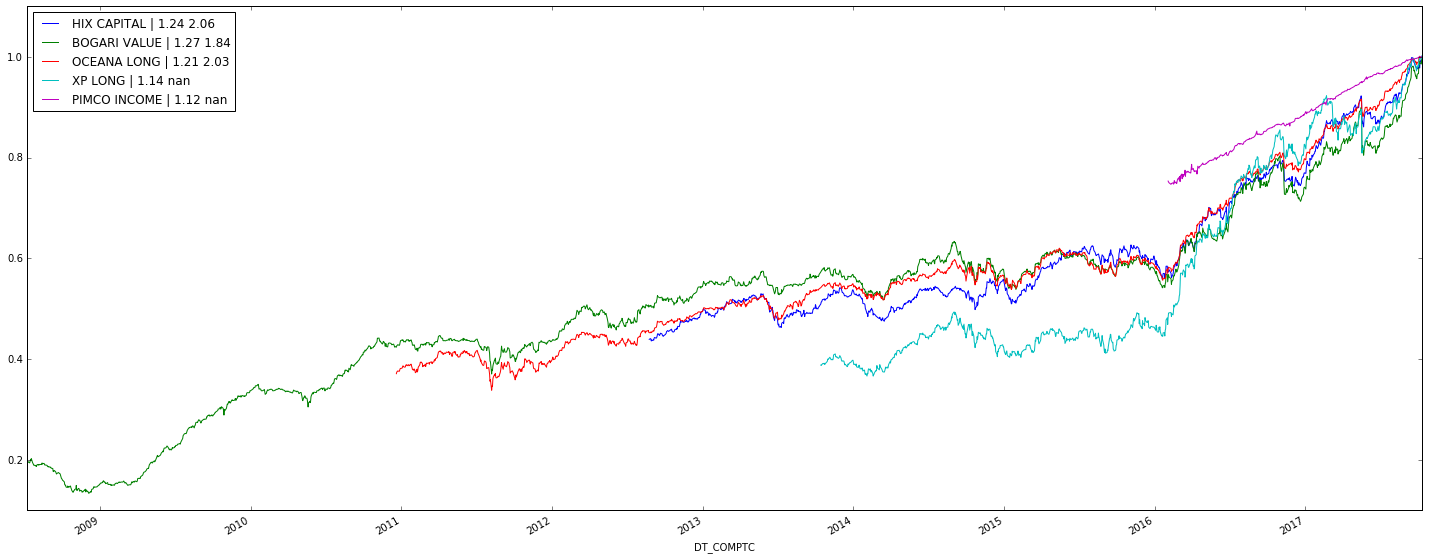

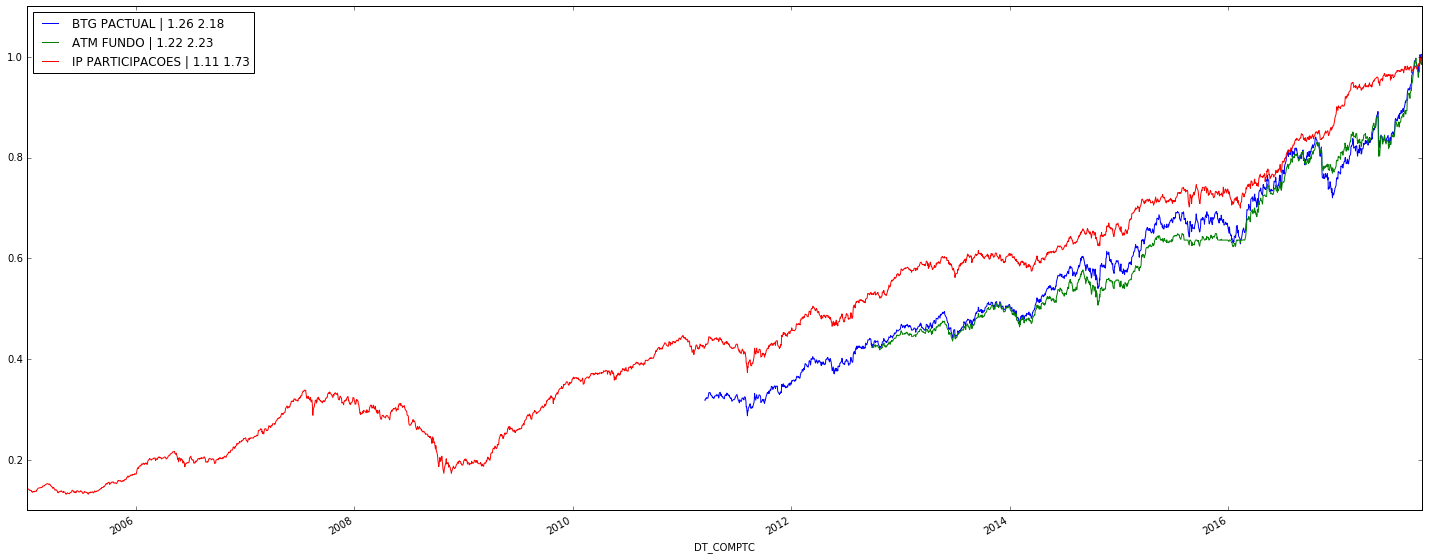

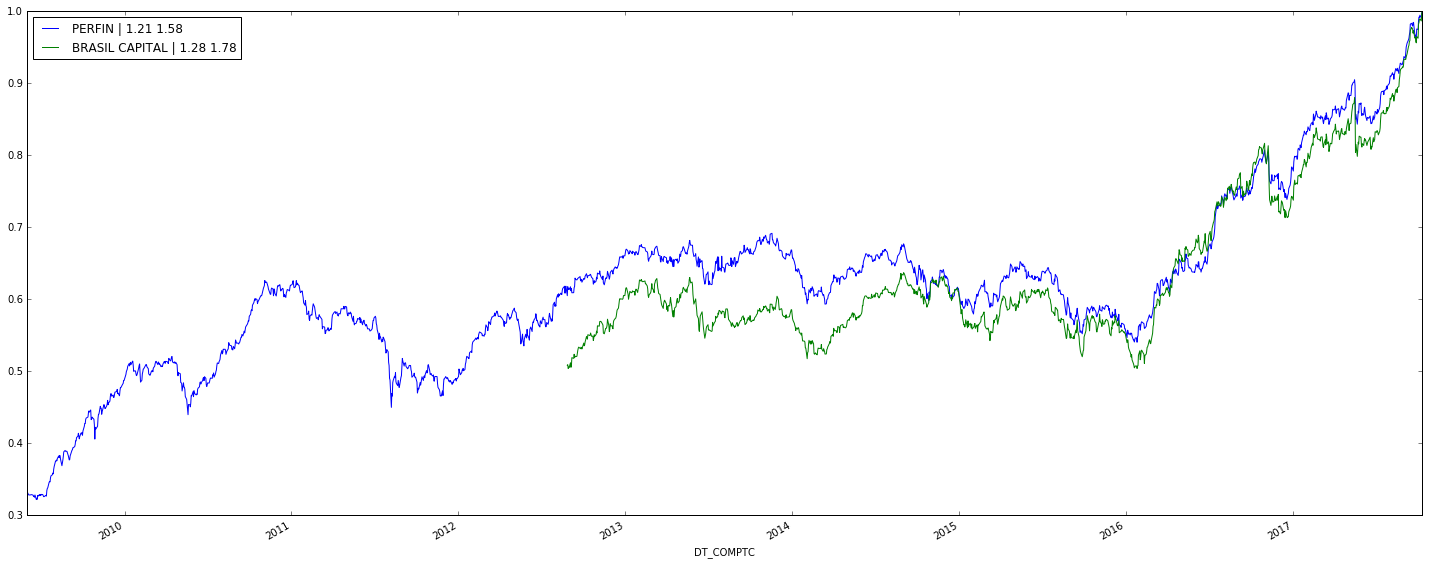

In [454]:
from collections import defaultdict

clusters = defaultdict(list)
for c,l in zip(cnpjs, cl.labels_): clusters[l].append(c) 

late = []
for c,fs in list(clusters.iteritems()) + [ ('', late) ]:
    plt.figure(figsize=(25,10))
    if len(fs) == 1:
        late.extend(fs)
        continue
    for f in fs:
        plot_fundo(f, label=fundos[f])
    plt.legend(loc=2)
    plt.show()


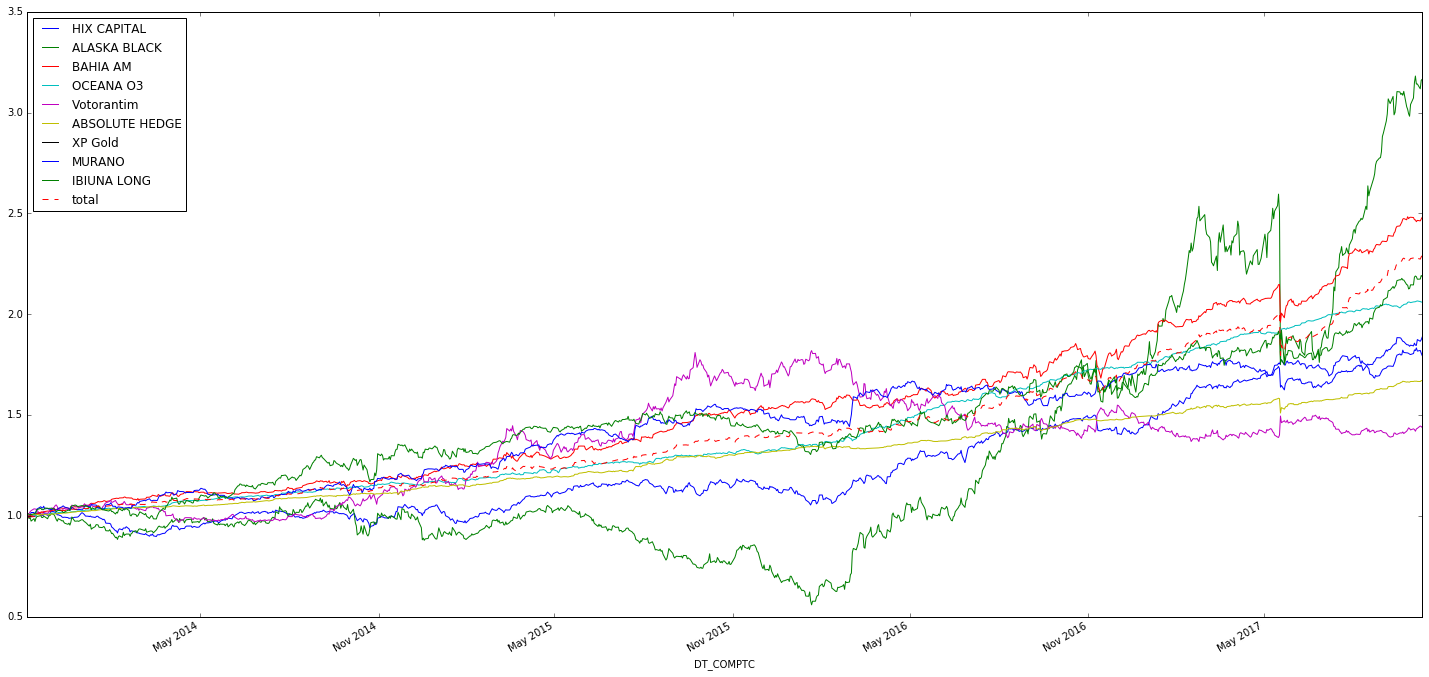

In [545]:
def simulate(kwargs):
    x = mt[ mt.index > '2013-11-01'] / mt.ix['2013-11-01']
    x['total'] = 0
    for c,w in kwargs.iteritems(): x['total'] += x[c].fillna(1)*w
    x['total'] = x['total'] / x['total'][0]
#     plt.figure(figsize=(25,12))
    x[kwargs.keys()].plot(figsize=(25,12))
    x['total'].plot(style='--')
    plt.legend(loc=2)
    
simulate({
    'ALASKA BLACK':    0.10, 
    'HIX CAPITAL':     0.00,
#     'BRASIL CAPITAL':  0.00,
#     '18.993.924/0001-00': 'XP LONG',

    'MURANO':          0.00, # quantitativo
    'IBIUNA LONG':     0.00, # similar adam - arrojado

    'ABSOLUTE HEDGE':  0.25, # conservador
    'BAHIA AM':        0.60,         
    'OCEANA O3':       0.00, # exterior - pimco?
    
    'Votorantim':      0.025,
    'XP Gold':         0.025,         # 2015-09
})

## Automatic

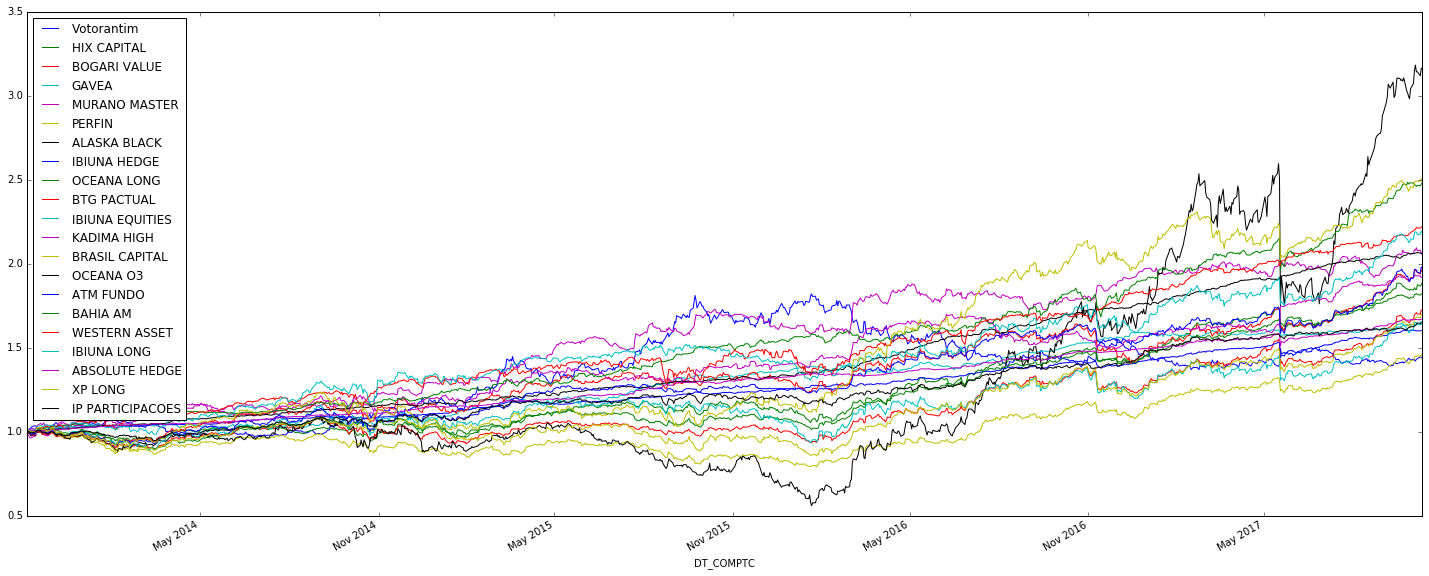

In [323]:

(mt[ mt.index > '2013-11-01'] / mt.ix['2013-11-01']).plot(figsize=(25,10))
plt.legend(loc=2)

In [504]:
prior = {
    'ALASKA BLACK':    0.07, 
    'HIX CAPITAL':     0.18, 

    'ABSOLUTE HEDGE':  0.10, # conservador
    'IBIUNA LONG':     0.20, # similar adam - arrojado
    'BAHIA AM':        0.20,         
    'MURANO':          0.10, # quantitativo
    'OCEANA O3':       0.10, # exterior - pimco?
    
    'Votorantim':      0.05,
#     'XP Gold':         0.02,         # 2015-09
}

In [505]:
(mt[ mt.index > '2013-11-01'] / mt.ix['2013-11-01'])[prior.keys()].head()

,HIX CAPITAL,ALASKA BLACK,BAHIA AM,OCEANA O3,Votorantim,ABSOLUTE HEDGE,MURANO,IBIUNA LONG
DT_COMPTC,,,,,,,,
2013-11-04,0.994203,1.006905,0.993938,0.999942,0.994311,1.001470,0.991520,1.002399
2013-11-05,0.993238,0.996553,0.993714,0.998187,1.011361,1.001815,0.998806,1.009722
2013-11-06,0.989621,0.986275,0.993423,1.001389,1.011625,1.003121,0.998359,1.007109
2013-11-07,0.998498,0.992702,0.996540,1.003390,1.020273,1.003583,0.999004,1.006234
2013-11-08,0.995954,0.973688,0.995028,1.000999,1.025519,1.002875,1.016322,1.005802


In [509]:
from scipy.optimize import *

vec = (mt[ mt.index > '2013-11-01'] / mt.ix['2013-11-01'])[prior.keys()].values
x0  = [ prior[c] for c in mt.columns if c in prior.keys() ]

loss   = lambda x: -(np.dot(vec, x)).sum()
bounds = [ (0,1) for _ in x0 ]
cons   = (
    { 'type': 'eq',   'fun': lambda x:  np.sum(x) - 1 },
)

options= {
    'x0':          x0,
    'niter':       100000,
#     'accept_test': lambda f_new, x_new, f_old, x_old: bool(np.sum(x_new) == 1) and bool(np.sign(x_new).sum() == len(x_new)),
#     'disp':        True,
    'minimizer_kwargs': {
        'bounds':      bounds,
        'constraints': cons,
    }
}

a = minimize(loss, constraints=cons, bounds=bounds, x0=x0)

# a = basinhopping(loss, **options)
a # zip(mt.columns, a.x)


     fun: -1511.1142343997903
     jac: array([-1226.62084961, -1263.93463135, -1511.11424255, -1403.30653381,
       -1336.74986267, -1280.97750854, -1419.65206909, -1446.14416504,
           0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 3
    njev: 2
  status: 0
 success: True
       x: array([  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
         3.68855643e-10,   0.00000000e+00,   0.00000000e+00,
         5.11845264e-10,   7.41066350e-10])

In [414]:
np.sum([5.71930379,   0.99202091,  -4.66480732,   1.6021769 ,
        12.33482992,  -6.17577287,   4.28662025,   3.1603043 ,
         1.53884284,   5.03637816,  -5.8953686 ,   6.33742801,
        -7.41576466,   4.09740342,   4.2694843 ,   8.89400522,
         6.21823437,   7.7127687 ,   4.88279539,   6.79268236,   2.71523483])

62.438800219999997

## Consulta

In [270]:
search_name('PIMCO INCOME')

,DENOM_SOCIAL,DT_REG,DT_CONST,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,CLASSE,DT_INI_CLASSE,RENTAB_FUNDO,...,INVEST_QUALIF,TAXA_PERFM,VL_PATRIM_LIQ,DT_PATRIM_LIQ,DIRETOR,CNPJ_ADMIN,ADMIN,PF_PJ_GESTOR,CPF_CNPJ_GESTOR,GESTOR
CNPJ_FUNDO,,,,,,,,,,,,,,,,,,,,,
27.945.462/0001-38,INVESTCENTER PIMCO INCOME FUNDO DE INVESTIMENT...,2017-07-07,2017-07-05,NaN,FASE PRÉ-OPERACIONAL,2017-07-05,NaN,Fundo Multimercado,2017-07-05,DI de um dia,...,S,NaN,8.635257e+08,2017-10-10,FERNANDO MATTAR BEYRUTI,60.701.190/0001-04,ITAU UNIBANCO S.A.,PJ,33.311.713/0001-25,ITAU DTVM S.A.
26.470.473/0001-46,ITAÚ PERSONNALITÉ SELEÇÃO PIMCO INCOME FICFI M...,2017-06-12,2017-06-08,NaN,EM FUNCIONAMENTO NORMAL,2017-06-28,2017-06-28,Fundo Multimercado,2017-06-08,NaN,...,S,NaN,7.854414e+08,2017-10-10,FERNANDO MATTAR BEYRUTI,60.701.190/0001-04,ITAU UNIBANCO S.A.,PJ,33.311.713/0001-25,ITAU DTVM S.A.
23.729.512/0001-99,PIMCO INCOME FI EM COTAS DE FUNDOS DE INVESTIM...,2016-02-01,2016-01-29,NaN,EM FUNCIONAMENTO NORMAL,2016-02-03,2016-02-03,Fundo Multimercado,2016-01-29,NaN,...,S,0.000000000000,1.903099e+09,2017-10-10,CARLOS AUGUSTO SALAMONDE,02.201.501/0001-61,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,PJ,14.869.060/0001-50,PIMCO LATIN AMERICA ADMINISTRADORA DE CARTEIRA...
23.720.107/0001-00,PIMCO INCOME FUNDO DE INVESTIMENTO MULTIMERCAD...,2016-02-01,2016-01-29,NaN,EM FUNCIONAMENTO NORMAL,2016-02-03,2016-02-03,Fundo Multimercado,2016-01-29,NaN,...,S,0.000000000000,5.327469e+09,2017-10-10,CARLOS AUGUSTO SALAMONDE,02.201.501/0001-61,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,PJ,14.869.060/0001-50,PIMCO LATIN AMERICA ADMINISTRADORA DE CARTEIRA...
